# Single agent with acceleration control

Built on the single speed-controlling agent model in [First simple tests](../first simple tests/First simple test.ipynb), but modifying such that step-wise adjustments are not applied to speed $v$ and heading $\psi$ directly, but instead to longitudinal acceleration $a$ and to a steering angle $\delta$, which generates yaw rates $\omega$ with a simplified lateral dynamics model $\omega = K_s v \delta$. In other words, instead of controlling speed and heading directly, the agent operates on longitudinal and rotational accelerations, like a driver does. Also increasing the adjustment duration to $\Delta T$ = 0.5 s, to be a little more driving-like (taking into account also vehicle dynamics delays).

Extending the value function to:

$V = -k_g v_g - k_o \sum_i 1 / \tau_i - C_v v^2 - C_a a^2 - C_{\omega} (v/\omega)^2 - C_p \Delta a^2 - C_t \Delta \delta^2 - C_g a_g^2$

where the first three terms work in the same way as in the speed-controlling model. The logic of the $C_{\omega}$ term is that $v/\omega$ is lateral acceleration, i.e., this is a lateral acceleration discomfort term, analogous to the longitudinal acceleration discomfort term just before it. Then follow two terms with effort costs for applying acceleration and steering angle adjustments $\Delta a$ and $\Delta \delta$.

The final value function term is a cost for experiencing a high required acceleration $a_g$ for stopping at the goal. If the agent is heading straight toward the goal, trivially $a_g = -v^2 / 2 d_g$, where $d_g$ is the distance to the goal. The current implementation instead uses the distance $d_g'$ to the point where the agent will be passing the goal, i.e., when $v_g$ will pass zero and turn negative (which reduces to the above expression when the heading is straight toward the goal).

Below it can be seen that it sort of works:


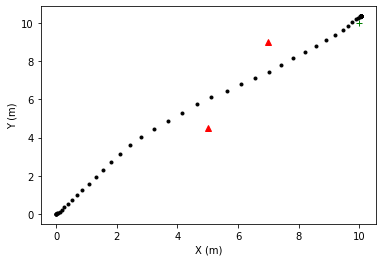

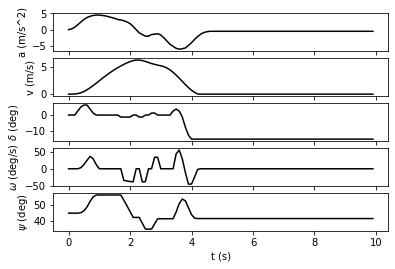

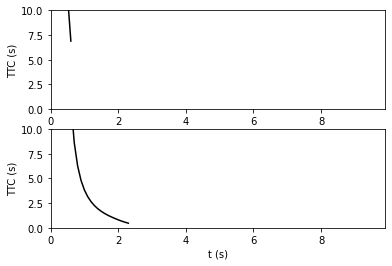

In [15]:
import numpy as np
import importlib
import one_agent
importlib.reload(one_agent)

x_goal = np.array([10, 10])
x_obstacles = np.array([[5, 4.5], [7, 9]])
one_agent.run_simulation(x_goal, x_obstacles)

Just to illustrate what the $C_g$ term does, below the same simulation is run again but with $C_g$ = 0, i.e., no cost for a high required deceleration to be able to stop at the goal. The agent now has no good way of figuring out how to stop at the goal - because the value function only rewards it for keeping a high speed toward the goal, and then all of a sudden punishes it severely for having passed the goal. 

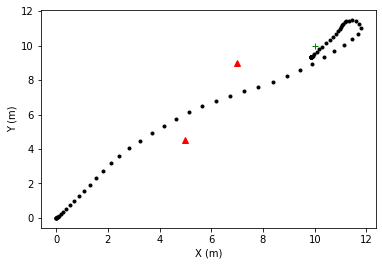

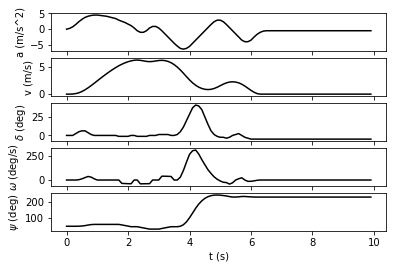

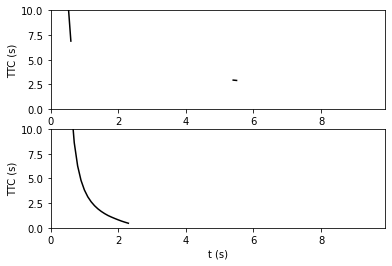

In [13]:
# removing the cost for required deceleration to stop at goal
params = one_agent.get_default_params()
params["C_g"] = 0
one_agent.run_simulation(x_goal, x_obstacles, params)

Also a test with increased costs for acceleration and steering adjustments, resulting in the agent going around the obstacles instead:

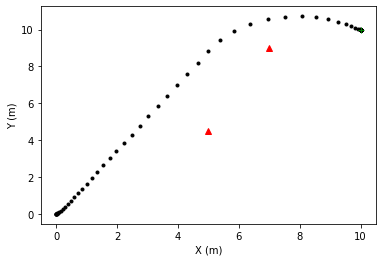

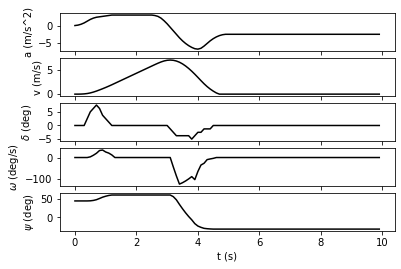

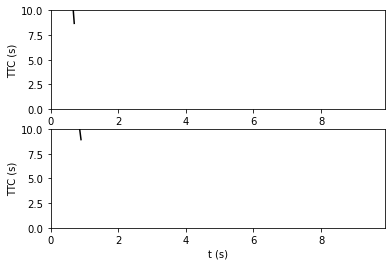

In [14]:
# increasing the control adjustment costs
params = one_agent.get_default_params()
params["C_p"] = 1
params["C_t"] = 1
one_agent.run_simulation(x_goal, x_obstacles, params)

# Conclusion

This seems rather promising - not too difficult to get to work. However, the value function is getting quite complicated, and I think to generalise to a wide range of scenarios we might need additional terms also for dealing properly with the second order yaw acceleration control, e.g., things like "with this control action I won't end up heading toward the goal, but at least my yaw rate will be such that I will be on track to heading toward the goal pretty soon". Or "with this control action I will be heading toward the goal, but I will have a high yaw rate making me quickly head in another direction afterwards". 

Therefore, a good next step will definitely be to simplify to just longitudinal acceleration control, before getting into modelling of two acceleration-controlling agents.